## Filtering out subregion based on number of points and number of coastal points 

In [25]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box

# Load the shapefile
gdf = gpd.read_file('UK_PPT_DEM_12km.shp')

# Define grid size in meters (adjust as needed)
x_interval = 80000  # e.g., 80 km
y_interval = 80000  # e.g., 80 km

# Get the bounds of the entire dataset
x_min_global, y_min_global, x_max_global, y_max_global = gdf.total_bounds

# Create subregions as bounding boxes
def create_subregions(x_min, x_max, y_min, y_max, x_interval, y_interval):
    subregions = []
    x_bins = np.arange(x_min, x_max + x_interval, x_interval)
    y_bins = np.arange(y_min, y_max + y_interval, y_interval)
    
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            min_x_bin = x_bins[i]
            max_x_bin = x_bins[i + 1]
            min_y_bin = y_bins[j]
            max_y_bin = y_bins[j + 1]
            subregions.append(box(min_x_bin, min_y_bin, max_x_bin, max_y_bin))
    
    return subregions

# Generate subregions
subregions = create_subregions(x_min_global, x_max_global, y_min_global, y_max_global, x_interval, y_interval)

# Create a GeoDataFrame for subregions
subregions_gdf = gpd.GeoDataFrame({'geometry': subregions}, crs=gdf.crs)

# Add a unique sequential ID for each subregion, starting from 1
subregions_gdf['subregion_id'] = range(1, len(subregions_gdf) + 1)

# Spatial join to assign subregions to the original GeoDataFrame
gdf_with_subregions = gdf.copy()
gdf_with_subregions['subregion_id'] = None

for index, row in subregions_gdf.iterrows():
    subregion_polygon = row['geometry']
    mask = gdf.intersects(subregion_polygon)
    gdf_with_subregions.loc[mask, 'subregion_id'] = row['subregion_id']

# Save the updated GeoDataFrame with subregion information
gdf_with_subregions.to_file('subregions_base.shp')

print("Shapefile with subregions saved successfully.")



Shapefile with subregions saved successfully.


C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\675370958.py:50: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_with_subregions.to_file('subregions_base.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion_id' to 'subregion_'
  ogr_write(


In [ ]:
import geopandas as gpd

# Load the shapefile with points and subregions
gdf_with_subregions = gpd.read_file('subregions_imputed.shp')

# Group points by subregion_id and count the number of points in each subregion
subregion_counts = gdf_with_subregions.groupby('subregion_').size()

# Print the number of points for each subregion
print("Number of points per subregion:")
for subregion_id, count in subregion_counts.items():
    print(f"Subregion ID {subregion_id}: {count} points")


In [26]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box

# Load the shapefile
gdf = gpd.read_file('UK_PPT_DEM_12km.shp')

# Define grid size in meters (adjust as needed)
x_interval = 80000  # e.g., 80 km
y_interval = 80000  # e.g., 80 km

# Get the bounds of the entire dataset
x_min_global, y_min_global, x_max_global, y_max_global = gdf.total_bounds

# Create subregions as bounding boxes
def create_subregions(x_min, x_max, y_min, y_max, x_interval, y_interval):
    subregions = []
    x_bins = np.arange(x_min, x_max + x_interval, x_interval)
    y_bins = np.arange(y_min, y_max + y_interval, y_interval)
    
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            min_x_bin = x_bins[i]
            max_x_bin = x_bins[i + 1]
            min_y_bin = y_bins[j]
            max_y_bin = y_bins[j + 1]
            subregions.append(box(min_x_bin, min_y_bin, max_x_bin, max_y_bin))
    
    return subregions

# Generate subregions
subregions = create_subregions(x_min_global, x_max_global, y_min_global, y_max_global, x_interval, y_interval)

# Create a GeoDataFrame for subregions
subregions_gdf = gpd.GeoDataFrame({'geometry': subregions}, crs=gdf.crs)

# Add a unique sequential ID for each subregion, starting from 1
subregions_gdf['subregion_id'] = range(1, len(subregions_gdf) + 1)

# Spatial join to assign subregions to the original GeoDataFrame
gdf_with_subregions = gdf.copy()
gdf_with_subregions['subregion_id'] = None

# Spatial join: assign subregion_id to each feature in the original GeoDataFrame
for idx, subregion in subregions_gdf.iterrows():
    subregion_polygon = subregion['geometry']
    mask = gdf_with_subregions.intersects(subregion_polygon)
    gdf_with_subregions.loc[mask, 'subregion_id'] = subregion['subregion_id']

# Ensure no missing subregion_id values
gdf_with_subregions['subregion_id'] = gdf_with_subregions['subregion_id'].fillna(-1).astype(int)

# Save the updated GeoDataFrame with subregion information
gdf_with_subregions.to_file('subregions_base.shp')

print("Shapefile with subregions saved successfully.")


Shapefile with subregions saved successfully.


C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\2034460480.py:51: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdf_with_subregions['subregion_id'] = gdf_with_subregions['subregion_id'].fillna(-1).astype(int)
C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\2034460480.py:54: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_with_subregions.to_file('subregions_base.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion_id' to 'subregion_'
  ogr_write(


In [27]:
import geopandas as gpd

# Load the shapefile with subregions
gdf_with_subregions = gpd.read_file('subregions_base.shp')

# Group by 'subregion_id' and find subregions with at least one coastal point
coastal_subregions = gdf_with_subregions.groupby('subregion_').apply(
    lambda x: 'coastal' in x['classifica'].values
)

# Filter to keep only subregions that contain at least one coastal point
valid_subregions = coastal_subregions[coastal_subregions].index

# Filter the GeoDataFrame to include only points from valid subregions
gdf_filtered = gdf_with_subregions[gdf_with_subregions['subregion_'].isin(valid_subregions)]


gdf_with_subregions = gdf_filtered

# Group by 'subregion_id'
grouped = gdf_with_subregions.groupby('subregion_')

# Initialize lists to keep valid subregions and their IDs
valid_subregion_ids = []

# Iterate over each subregion
for subregion_id, group in grouped:
    if len(group) >= 5:
        valid_subregion_ids.append(subregion_id)

# Filter the GeoDataFrame to include only valid subregions
gdf_filtered = gdf_with_subregions[gdf_with_subregions['subregion_'].isin(valid_subregion_ids)]

# Save the filtered GeoDataFrame to a new shapefile
gdf_filtered.to_file('subregions.shp')

print(f'Filtered shapefile with valid subregions saved successfully.')


Filtered shapefile with valid subregions saved successfully.


C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\2212638063.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coastal_subregions = gdf_with_subregions.groupby('subregion_').apply(


In [28]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd
from tqdm import tqdm

# Load the shapefile with subregions
gdf_with_subregions = gpd.read_file('subregions.shp')
crs = gdf_with_subregions.crs

# Prepare a list to store imputation results
results = []

# Iterate over each subregion with tqdm progress bar
for subregion_id, group in tqdm(gdf_with_subregions.groupby('subregion_'), desc='Processing Subregions'):
    if len(group) < 5:
        continue
    
    # Extract features and target variable
    features = group[['latitude', 'longitude', 'average_de']]
    target = group['value']
    
    # Separate coastal and non-coastal points
    coastal_points = group[group['classifica'] == 'coastal']
    non_coastal_points = group[group['classifica'] != 'coastal']
    
    if len(coastal_points) == 0:
        continue
    
    # Train SVR model for each coastal point
    for idx, coastal_point in tqdm(coastal_points.iterrows(), total=len(coastal_points), desc='Processing Coastal Points', leave=False):
        # Extract the test point
        test_point_features = np.array([[coastal_point['latitude'], coastal_point['longitude'], coastal_point['average_de']]])
        
        # Prepare training data
        coastal_points_excluding_current = coastal_points.drop(idx)
        training_data = pd.concat([non_coastal_points, coastal_points_excluding_current])
        X_train = training_data[['latitude', 'longitude', 'average_de']].values
        y_train = training_data['value'].values
        
        # Initialize SVR with RBF kernel
        svr = SVR(kernel='rbf')
        
        # Fit the model
        svr.fit(X_train, y_train)
        
        # Predict the value for the test point
        y_pred = svr.predict(test_point_features)
        
        # Append result
        results.append({
            'subregion_id': subregion_id,
            'coastal_point_id': coastal_point.name,  # Using index as unique identifier
            'latitude': coastal_point['latitude'],
            'longitude': coastal_point['longitude'],
            'average_de': coastal_point['average_de'],
            'imputed_value': y_pred[0],
            'true_value': coastal_point['value'],
            'mse': mean_squared_error([coastal_point['value']], [y_pred[0]])
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Convert the results DataFrame to a GeoDataFrame
results_gdf = gpd.GeoDataFrame(
    results_df,
    geometry=gpd.points_from_xy(results_df['longitude'], results_df['latitude']),
    crs=crs
)

# Save the imputation results to a shapefile
results_gdf.to_file('imputation_results.shp')
print('Imputation results saved successfully to "imputation_results.shp".')


Processing Subregions: 100%|██████████| 65/65 [00:01<00:00, 39.24it/s]
C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\2669564639.py:75: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  results_gdf.to_file('imputation_results.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion_id' to 'subregion_'
  ogr_write(
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'coastal_point_id' to 'coastal_po'
  ogr_write(
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'imputed_value' to 'imputed_va'
  ogr_write(


Imputation results saved successfully to "imputation_results.shp".


In [29]:
import geopandas as gpd
import pandas as pd

# Load the imputation results shapefile
results_gdf = gpd.read_file('imputation_results.shp')

# Group by subregion_id and calculate the average MSE
subregion_mse = results_gdf.groupby('subregion_')['mse'].mean().reset_index()
subregion_mse.columns = ['subregion_', 'avg_mse']

# Merge the average MSE with the subregions shapefile
subregions_gdf = gpd.read_file('subregions.shp')
subregions_with_mse = subregions_gdf.merge(subregion_mse, on='subregion_')


# Load the shapefile with subregions
subregions_gdf = subregions_with_mse

# Load the imputation results shapefile
imputation_results_gdf = gpd.read_file('imputation_results.shp')

# Rename columns for consistency
imputation_results_gdf.rename(columns={'lat': 'latitude', 'long': 'longitude'}, inplace=True)

# Merge the imputation results with the subregions on latitude and longitude
# We use 'inner' to ensure only matching rows are included
merged_gdf = subregions_gdf.merge(
    imputation_results_gdf[['subregion_', 'latitude', 'longitude', 'imputed_va', 'mse']],
    on=['latitude', 'longitude'], how='left'
)
#merged_gdf.drop('subregio_1')
# Save the updated subregions GeoDataFrame to a new shapefile
merged_gdf.to_file('subregions_imputed.shp')

print('Subregions with imputed values saved successfully to "subregions_with_imputation.shp".')


Subregions with imputed values saved successfully to "subregions_with_imputation.shp".


C:\Users\vibhu\AppData\Local\Temp\ipykernel_16484\3649931399.py:33: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file('subregions_imputed.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion__x' to 'subregion_'
  ogr_write(
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion__y' to 'subregio_1'
  ogr_write(


In [30]:
import geopandas as gpd
import pandas as pd

# Load the imputation results shapefile
imputation_results_gdf = gpd.read_file('imputation_results.shp')

# Calculate the average MSE for each subregion
subregion_mse = imputation_results_gdf.groupby('subregion_')['mse'].mean().reset_index()
subregion_mse.columns = ['subregion_', 'avg_mse']

# Define the MSE threshold (lifit)
limit = 0.5  # Example threshold value, replace with your specific threshold

# Filter subregions where average MSE is greater than the threshold
filtered_subregion_mse = subregion_mse[subregion_mse['avg_mse'] > limit]

# Sort the filtered results by average MSE in descending order
filtered_subregion_mse_sorted = filtered_subregion_mse.sort_values(by='avg_mse', ascending=False)

# Print the sorted filtered table
print(filtered_subregion_mse_sorted)

# Optional: Save the filtered and sorted results to a CSV file
filtered_subregion_mse_sorted.to_csv('filtered_subregion_avg_mse_sorted_desc.csv', index=False)
print('Filtered and sorted average MSE for each subregion saved to "filtered_subregion_avg_mse_sorted_desc.csv".')


    subregion_   avg_mse
29          91  4.244387
23          80  3.022159
34          98  2.744526
0            4  2.598543
1            5  2.586708
5           24  2.181695
22          79  2.122518
39         110  2.044309
33          97  1.801222
24          81  1.124872
7           39  1.049525
28          90  1.013435
21          78  0.907584
41         113  0.894253
9           43  0.819456
8           42  0.758057
31          94  0.753206
16          64  0.698303
2            7  0.644942
25          87  0.519729
30          93  0.502445
Filtered and sorted average MSE for each subregion saved to "filtered_subregion_avg_mse_sorted_desc.csv".


In [39]:
import geopandas as gpd

# Load the shapefile with imputation results
imputation_gdf = gpd.read_file('subregions_imputed.shp')

# Define the MSE threshold
mse_threshold = 0.1  # Adjust this value to your desired threshold

# Filter points where MSE is less than or equal to the threshold
filtered_gdf = imputation_gdf[imputation_gdf['mse'] >= mse_threshold]


print("Number of points with MSE more then threhold",len(filtered_gdf))

# Save the filtered points to a new shapefile
filtered_gdf.to_file('High_MSE_points.shp')




Number of points with MSE more then threhold 235


In [37]:
import geopandas as gpd

# Load the shapefile with imputation results
gdf = gpd.read_file('UK_PPT_DEM_12km.shp')

# Filter points where classification is 'coastal'
coastal_points = gdf[gdf['classifica'] == 'coastal']

# Count the number of coastal points
num_coastal_points = len(coastal_points)

print(f'Number of points with classification "coastal": {num_coastal_points}')


Number of points with classification "coastal": 538


Number of points with MSE less than or equal to 0: 0
Number of points with MSE less than or equal to 0.001: 43
Number of points with MSE less than or equal to 0.01: 129
Number of points with MSE less than or equal to 0.05: 228
Number of points with MSE less than or equal to 0.1: 266
Number of points with MSE less than or equal to 0.15: 293
Number of points with MSE less than or equal to 0.2: 312
Number of points with MSE less than or equal to 0.25: 335
Number of points with MSE less than or equal to 0.3: 349
Number of points with MSE less than or equal to 0.4: 363
Number of points with MSE less than or equal to 0.5: 376
Number of points with MSE less than or equal to 0.8: 398
Number of points with MSE less than or equal to 1.0: 412
Number of points with MSE less than or equal to 1.5: 433
Number of points with MSE less than or equal to 2.0: 449
Number of points with MSE less than or equal to 2.5: 459


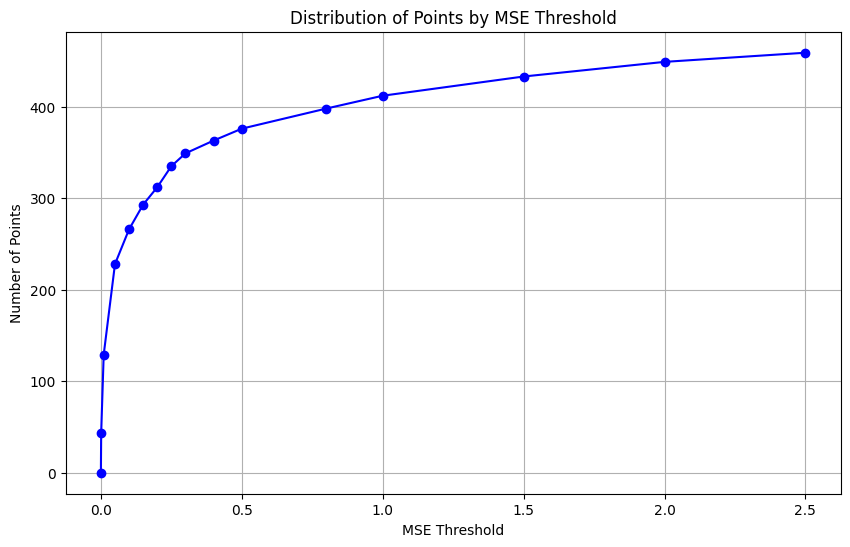

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile with imputation results
imputation_gdf = gpd.read_file('subregions_imputed.shp')

# Define multiple MSE thresholds
thresholds = [0,0.001,0.01,0.05,0.1,0.15, 0.2,0.25,0.3,0.4, 0.5, 0.8, 1.0,1.5,2.0,2.5]

# Initialize a list to store counts for each threshold
threshold_counts = []

# Filter points based on each threshold and count them
for threshold in thresholds:
    filtered_gdf = imputation_gdf[imputation_gdf['mse'] <= threshold]
    threshold_counts.append(len(filtered_gdf))
    print(f'Number of points with MSE less than or equal to {threshold}: {len(filtered_gdf)}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, threshold_counts, marker='o', linestyle='-', color='b')
plt.xlabel('MSE Threshold')
plt.ylabel('Number of Points')
plt.title('Distribution of Points by MSE Threshold')
plt.grid(True)
plt.show()
